In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
from keras.regularizers import l2
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.preprocessing.image import  load_img
import warnings
warnings.filterwarnings('ignore')
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#import pickle

In [2]:
# Define image size and other parameters
img_width, img_height = 256, 256
batchsize = 32
epochs = 4
num_of_class = 2

validation = keras.utils.image_dataset_from_directory(
    directory='Resources/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 16 files belonging to 2 classes.


In [3]:
test = keras. utils.image_dataset_from_directory(
    directory='Resources/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 624 files belonging to 2 classes.


In [4]:
train = keras. utils.image_dataset_from_directory(
    directory='Resources/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.


In [6]:
print(train.class_names)
print(validation.class_names)
print(test.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [7]:
x_train = []
y_train = []

for feature, label in train:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [7]:
x_train

array([[[[4.23945312e+01, 4.23945312e+01, 4.23945312e+01],
         [5.03125000e+01, 5.03125000e+01, 5.03125000e+01],
         [5.22988281e+01, 5.22988281e+01, 5.22988281e+01],
         ...,
         [9.81699219e+01, 9.81699219e+01, 9.81699219e+01],
         [4.11875000e+01, 4.11875000e+01, 4.11875000e+01],
         [3.61152344e+01, 3.61152344e+01, 3.61152344e+01]],

        [[4.63125000e+01, 4.63125000e+01, 4.63125000e+01],
         [5.57871094e+01, 5.57871094e+01, 5.57871094e+01],
         [5.37910156e+01, 5.37910156e+01, 5.37910156e+01],
         ...,
         [1.66513672e+02, 1.66513672e+02, 1.66513672e+02],
         [4.06289062e+01, 4.06289062e+01, 4.06289062e+01],
         [4.27246094e+01, 4.27246094e+01, 4.27246094e+01]],

        [[4.98437500e+01, 4.98437500e+01, 4.98437500e+01],
         [5.26562500e+01, 5.26562500e+01, 5.26562500e+01],
         [5.59687500e+01, 5.59687500e+01, 5.59687500e+01],
         ...,
         [1.83130859e+02, 1.83130859e+02, 1.83130859e+02],
         [

In [8]:
x_train.shape

(5216, 256, 256, 3)

In [10]:
x_train=x_train[0:500]
y_train=y_train[0:500]

In [11]:
x_train[0]

array([[[78.250885, 78.250885, 78.250885],
        [78.92328 , 78.92328 , 78.92328 ],
        [83.97891 , 83.97891 , 83.97891 ],
        ...,
        [96.99609 , 96.99609 , 96.99609 ],
        [83.58093 , 83.58093 , 83.58093 ],
        [83.51349 , 83.51349 , 83.51349 ]],

       [[79.180786, 79.180786, 79.180786],
        [85.54672 , 85.54672 , 85.54672 ],
        [82.462524, 82.462524, 82.462524],
        ...,
        [92.24454 , 92.24454 , 92.24454 ],
        [85.93344 , 85.93344 , 85.93344 ],
        [90.86984 , 90.86984 , 90.86984 ]],

       [[84.9039  , 84.9039  , 84.9039  ],
        [87.94925 , 87.94925 , 87.94925 ],
        [87.540375, 87.540375, 87.540375],
        ...,
        [90.70828 , 90.70828 , 90.70828 ],
        [98.70706 , 98.70706 , 98.70706 ],
        [83.50391 , 83.50391 , 83.50391 ]],

       ...,

       [[ 0.      ,  0.      ,  0.      ],
        [ 0.      ,  0.      ,  0.      ],
        [ 0.      ,  0.      ,  0.      ],
        ...,
        [ 0.      ,  0.   

In [12]:
y_train[0]

array([1., 0.], dtype=float32)

In [ ]:
y_train

In [13]:
x_val = []
y_val = []
    
for feature, label in validation:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

x_val = np.concatenate(x_val, axis=0)

y_val = np.concatenate(y_val, axis=0)

In [14]:
x_test = []
y_test = []

for feature, label in test:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())

x_test = np.concatenate(x_test, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [15]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (500, 256, 256, 3)
Shape of 'y_train': (500, 2)
Shape of 'x_val': (16, 256, 256, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 256, 256, 3)
Shape of 'y_test': (624, 2)


In [16]:
x_train=x_train/255
x_val=x_val/255
x_test=x_test/255

In [17]:
y_train = y_tran[]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [12]:
# x_train_pneumonia = []
# x_train_normal = []

# for i in range(len(x_train)):
#     if y_train[i][0] == 0:
#         x_train_pneumonia.append(list(x_train[i]))
#     else:
#         x_train_normal.append(list(x_train[i]))

# x_train_pneumonia = np.array(x_train_pneumonia)
# x_train_normal = np.array(x_train_normal)

In [13]:
# print(np.shape(x_train_pneumonia))

(3875, 256, 256, 3)


In [14]:
# x_train_pneumonia[0][0]

array([[0.1868681 , 0.1868681 , 0.1868681 ],
       [0.17781863, 0.17781863, 0.17781863],
       [0.17781863, 0.17781863, 0.17781863],
       [0.17144608, 0.17144608, 0.17144608],
       [0.17225413, 0.17225413, 0.17225413],
       [0.17316176, 0.17316176, 0.17316176],
       [0.16605392, 0.16605392, 0.16605392],
       [0.15833333, 0.15833333, 0.15833333],
       [0.15424709, 0.15424709, 0.15424709],
       [0.15294118, 0.15294118, 0.15294118],
       [0.14752987, 0.14752987, 0.14752987],
       [0.13833487, 0.13833487, 0.13833487],
       [0.14264706, 0.14264706, 0.14264706],
       [0.12860754, 0.12860754, 0.12860754],
       [0.11857767, 0.11857767, 0.11857767],
       [0.1254902 , 0.1254902 , 0.1254902 ],
       [0.12220052, 0.12220052, 0.12220052],
       [0.11060432, 0.11060432, 0.11060432],
       [0.1125    , 0.1125    , 0.1125    ],
       [0.10233992, 0.10233992, 0.10233992],
       [0.09681372, 0.09681372, 0.09681372],
       [0.08897059, 0.08897059, 0.08897059],
       [0.

In [15]:
# print(np.shape(x_train_normal))

(1341, 256, 256, 3)


In [16]:
# datagen_pneumonia = ImageDataGenerator(
#     zoom_range = 0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip = True
# )

# datagen_pneumonia.fit(x_train_pneumonia)
# batch_size = np.shape(x_train_pneumonia)[0]
# x_train_pneumonia_1 = next(datagen_pneumonia.flow(x_train_pneumonia, batch_size=batch_size))
# x_train_pneumonia_expanded = np.concatenate((np.array(x_train_pneumonia), np.array(x_train_pneumonia_1)), axis=0)

# x_train_pneumonia = x_train_pneumonia_expanded

# datagen_pneumonia.fit(x_train_pneumonia)
# batch_size = np.shape(x_train_pneumonia)[0]
# x_train_pneumonia_1 = next(datagen_pneumonia.flow(x_train_pneumonia, batch_size=batch_size))
# x_train_pneumonia_expanded = np.concatenate((np.array(x_train_pneumonia), np.array(x_train_pneumonia_1)), axis=0)

In [17]:
# print(np.shape(x_train_pneumonia_expanded))

(15500, 256, 256, 3)


In [18]:
# datagen_normal = ImageDataGenerator(
#     zoom_range = 0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip = True
# )

# datagen_normal.fit(x_train_normal)

# batch_size = np.shape(x_train_normal)[0]
# x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
# x_train_normal_expanded = np.concatenate((np.array(x_train_normal), np.array(x_train_normal_1)), axis=0)

# x_train_normal = x_train_normal_1

# for i in range(3):
#     datagen_normal.fit(x_train_normal)
#     x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
#     x_train_normal_expanded = np.concatenate((x_train_normal_expanded, np.array(x_train_normal_1)), axis=0)

#     x_train_normal = x_train_normal_1
    
# x_train_normal = x_train_normal[:1045]

# datagen_normal.fit(x_train_normal)
# batch_size = np.shape(x_train_normal)[0]
# x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
# x_train_normal_expanded = np.concatenate((x_train_normal_expanded, np.array(x_train_normal_1)), axis=0)

# x_train_normal = x_train_normal_expanded

# datagen_normal.fit(x_train_normal)
# batch_size = np.shape(x_train_normal)[0]
# x_train_normal_1 = next(datagen_normal.flow(x_train_normal, batch_size=batch_size))
# x_train_normal_expanded = np.concatenate((x_train_normal_expanded, np.array(x_train_normal_1)), axis=0)

In [19]:
# print(np.shape(x_train_normal_expanded))

(15500, 256, 256, 3)


In [20]:
# x_train = np.concatenate((x_train_pneumonia_expanded, x_train_normal_expanded), axis=0)

# y_train = []
# for i in range(len(x_train_pneumonia_expanded)):
#     y_train.append(0)
# for i in range(len(x_train_normal_expanded)):
#     y_train.append(1)
# y_train = np.array(y_train)

In [21]:
# print(np.shape(y_train))

(31000,)


In [ ]:
# # Create the dictionary
# pneumonia_dict = {
#     'x_train': x_train,
#     'x_test': x_test,
#     'y_train': y_train,
#     'y_test': y_test,
#     'x_val': x_val,
#     'y_val': y_val
# }



In [56]:
# # Store the dictionary in a pickle file
# with open('Resources/pneumonia_dict.pkl', 'wb') as file:
#     pickle.dump(pneumonia_dict, file)

In [24]:
#!pip install h5py

In [18]:
import h5py

In [23]:
# from tensorflow.keras.utils import to_categorical
# # Assuming y_train contains labels 0 and 1
# y_train = to_categorical(y_train, num_classes=2)
# y_train = to_categorical(y_train, num_classes=2)
# y_train = to_categorical(y_train, num_classes=2)

In [19]:
# We use transfer learning with VGG16 as the base model
def CNN_Model():
    base_model = VGG16(weights='imagenet', include_top = False, input_shape=(img_width, img_height, 3))
    # Freeze the base model
    for layer in base_model.layers:
        layer.trainable = False
    for i in range(3):
        base_model.layers[-2-i].trainable = True
    CNN = Sequential()
    CNN.add(Input(shape=(img_width, img_height,3)))
    CNN.add(base_model)
    CNN.add(Flatten())
    CNN.add(Dropout(0.3))
    CNN.add(Dense(128, activation='relu', kernel_regularizer=l2(0.05)))
    CNN.add(Dropout(0.2))
    CNN.add(Dense(2, activation='sigmoid'))
    return CNN
# Training The CNN
model = CNN_Model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
# Visualized Layers of CNN
# keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,909,378 (72.13 MB)

 Trainable params: 11,274,114 (43.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

In [20]:
hist = model.fit(x_train, y_train, epochs= 6, validation_data= (x_val, y_val))
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.6892 - loss: 8.4344 - val_accuracy: 0.5000 - val_loss: 3.4708
Epoch 2/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.7677 - loss: 1.5462 - val_accuracy: 0.5000 - val_loss: 2.3998
Epoch 3/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.7749 - loss: 0.7133 - val_accuracy: 0.7500 - val_loss: 1.2345
Epoch 4/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8926 - loss: 0.4853 - val_accuracy: 0.6875 - val_loss: 1.5147
Epoch 5/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9084 - loss: 0.4089 - val_accuracy: 0.6875 - val_loss: 1.7677
Epoch 6/6
16/16 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.9141 - loss: 0.3683 - val_accuracy: 0.5625 - val_loss: 6.6082
{'accuracy': [0.734000027179718, 0.7799999713897705, 0.8159999847412109, 0.8799999952316284, 0.9120000004768372, 0.9079999923706055], 'loss': [5.370398998260498, 1.3407732248306274, 0.6539236307144165, 0.47984907031059265, 0.3972139060497284, 0.47414

In [21]:
model.evaluate(x_test, y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step - accuracy: 0.6661 - loss: 5.8918


[5.771866321563721, 0.6698718070983887]

In [22]:
x_test_predict=model.predict(x_test)
print(x_test_predict.shape)
pred_final=np.argmax(x_test_predict,axis=1)
print(pred_final.shape)
print(pred_final)

20/20 ━━━━━━━━━━━━━━━━━━━━ 36s 2s/step
(624, 2)
(624,)
[1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 

In [24]:
print(x_test_predict)

[[9.12257793e-19 1.00000000e+00]
 [9.68669049e-21 1.00000000e+00]
 [1.43608223e-24 1.00000000e+00]
 ...
 [3.90319797e-25 1.00000000e+00]
 [4.32668658e-11 1.00000000e+00]
 [1.09750836e-07 9.99999762e-01]]


In [32]:
for i in x_test_predict:
    print(np.sum(i))

1.0
1.0
1.0
1.0
0.98893267
1.0
1.0
1.0
0.95400083
0.9995431
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99997896
0.99999994
0.99980605
1.0
0.7834751
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999994
1.0
1.0
0.80646074
1.0
1.0
1.0
1.0
1.0
0.99999243
1.0
1.0
1.0
0.9288007
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.3664239
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99966186
1.0
1.0
0.99971944
1.0
1.0
0.99999964
0.9910637
1.0
1.0
1.0
0.98318833
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.97126186
1.0
0.9511515
0.9481767
0.73594505
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9165547
1.0
1.0
1.0
1.0
1.0
1.0
0.9994984
1.0
1.0
1.0
1.0
1.0
1.0
0.99892807
0.96971357
1.0
1.0
0.99977094
1.0
0.99999994
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99361783
1.0
0.9886435
1.0
1.0
0.9847544
1.0
1.0
1.0
1.0
1.0
0.8577496
1.0
0.9877169
1.0
0.9985023
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9658862
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.9999982
1.0
0.9999904
0.9432825
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.99993944
1.0
0.6384953
1.0

In [27]:
x_test_predict

array([[0.25631747, 0.7455009 ],
       [0.25631747, 0.7455009 ],
       [0.25631747, 0.7455009 ],
       ...,
       [0.25631747, 0.7455009 ],
       [0.25631747, 0.7455009 ],
       [0.25631747, 0.7455009 ]], dtype=float32)

In [26]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [31]:
!pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/38.6 MB 3.5 MB/s eta 0:00:12
    --------------------------------------- 0.6/38.6 MB 5.5 MB/s eta 0:00:07
   - -------------------------------------- 1.1/38.6 MB 7.0 MB/s eta 0:00:06
   - -------------------------------------- 1.6/38.6 MB 7.8 MB/s eta 0:00:05
   -- ------------------------------------- 2.3/38.6 MB 9.1 MB/s eta 0:00:05
   -- ------------------------------------- 2.4/38.6 MB 8.1 MB/s eta 0:00:05
   --- ------------------------------------ 3.0/38.6 MB 9.2 MB/s eta 0:00:04
   ---- ----------------------------------- 3.9/38.6 MB 9.9 MB/s eta 0:00:04
   ---- ----------------------------------- 4.2/38.6 MB 10.0 MB/s eta 0:00:04
   ----- ---------------------------------- 4.9/38.6 MB 10.5 MB/s eta 0:00:04
   ----- ---------------------------------- 5.4/38.6 MB 10.5 MB/s eta 0:00:04
   ------ 

In [33]:
import glob
import cv2

In [34]:
cv_img = []
for img in glob.glob("Resources/val1/*.jpeg"):
    n= cv2.imread(img)
    cv_img.append(n)

In [35]:
cv_img

[array([[[15, 15, 15],
         [15, 15, 15],
         [16, 16, 16],
         ...,
         [ 9,  9,  9],
         [ 8,  8,  8],
         [ 8,  8,  8]],
 
        [[15, 15, 15],
         [15, 15, 15],
         [16, 16, 16],
         ...,
         [12, 12, 12],
         [12, 12, 12],
         [13, 13, 13]],
 
        [[15, 15, 15],
         [15, 15, 15],
         [16, 16, 16],
         ...,
         [17, 17, 17],
         [17, 17, 17],
         [18, 18, 18]],
 
        ...,
 
        [[ 0,  0,  0],
         [ 0,  0,  0],
         [10, 10, 10],
         ...,
         [ 0,  0,  0],
         [ 8,  8,  8],
         [ 0,  0,  0]],
 
        [[18, 18, 18],
         [ 8,  8,  8],
         [ 0,  0,  0],
         ...,
         [ 0,  0,  0],
         [ 0,  0,  0],
         [17, 17, 17]],
 
        [[ 4,  4,  4],
         [10, 10, 10],
         [20, 20, 20],
         ...,
         [13, 13, 13],
         [ 8,  8,  8],
         [ 0,  0,  0]]], dtype=uint8),
 array([[[2, 2, 2],
         [2, 2, 2],
  

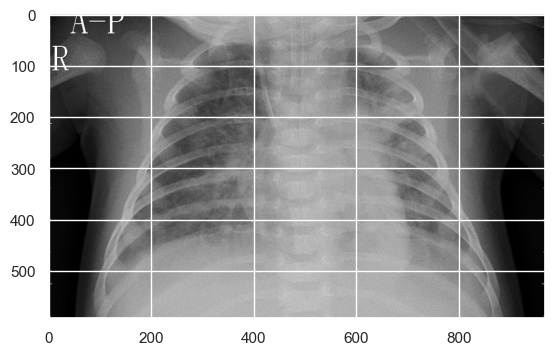

In [37]:
plt.imshow(cv_img[0])
plt.show()

In [39]:
from sklearn.metrics import classification_report

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets

In [52]:
import pandas as pd

In [64]:
y_test1=pd.DataFrame(y_test)[1].to_numpy()
y_test1

array([1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0.

In [66]:
print(classification_report(y_test1, pred_final))

              precision    recall  f1-score   support

         0.0       0.97      0.12      0.22       234
         1.0       0.65      1.00      0.79       390

    accuracy                           0.67       624
   macro avg       0.81      0.56      0.51       624
weighted avg       0.77      0.67      0.58       624



In [43]:
pred_final

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,